In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import graphviz

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc

matplotlib.rc("font", family="Malgun Gothic")

# 인공 신경망_분류

유방암 결과를 분류하는 신경망 모델을 만들고   
predict method를 이용하여 목표변수 범주를 예측하라.  
그리고 모델의 정확도와 confusion matrix를 구하라.
- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개)

|변수|변수 설명|변수 역할|변수 형태|
|---|---|---|---|
|diagnosis|진단결과(음성, 양성)|목표변수|이산형|
|mean radius|(세포)평균 반경|설명변수|연속형|
|mean texture|(세포)평균 질감|설명변수|연속형|
|mean perimeter|(세포)평균 둘레|설명변수|연속형|
|mean area|(세포)평균 면적|설명변수|연속형|
|mean smoothness|(세포)평균 매끄러움|설명변수|연속형|
|mean compactness|(세포)평균 조그만 정도|설명변수|연속형|
|mean concavity|(세포)평균 오목함|설명변수|연속형|
|mean concave points|(세포)평균 오목한 점의 수|설명변수|연속형|
|mean symmetry|(세포)평균 대칭|설명변수|연속형|
|mean fractal dimension|(세포)평균 프랙탈 차원|설명변수|연속형|
|radius error|(세포)반경의 표준오차|설명변수|연속형|
|texture error|(세포)질감의 표준오차|설명변수|연속형|
|perimeter error|(세포)둘레의 표준오차|설명변수|연속형|
|area error|(세포)면적의 표준오차|설명변수|연속형|
|smoothness error|(세포)매끄러움의 표준오차|설명변수|연속형|
|compactness error|(세포)조그만 정도의 표준오차|설명변수|연속형|
|concavity error|(세포)오목함의 표준오차|설명변수|연속형|
|concave points error|(세포)오목한 점의 수의 표준오차|설명변수|연속형|
|symmetry error|(세포)대칭의 표준오차|설명변수|연속형|
|fractal dimension error|(세포)프랙탈 차원의 표준오차|설명변수|연속형|
|worst radius|(세포)최대 반경|설명변수|연속형|
|worst texture|(세포)최대 질감|설명변수|연속형|
|worst perimeter|(세포)최대 둘레|설명변수|연속형|
|worst area|(세포)최대 면적|설명변수|연속형|
|worst smoothness|(세포)최대 매끄러움|설명변수|연속형|
|worst compactness|(세포)최대 조그만 정도|설명변수|연속형|
|worst concavity|(세포)최대 오목함|설명변수|연속형|
|worst concave points|(세포)최대 오목한 점의 수|설명변수|연속형|
|worst symmetry|(세포)최대 대칭|설명변수|연속형|
|worst fractal dimension|(세포)최대 프랙탈 차원|설명변수|연속형|


## 1. 데이터 구성하기

In [2]:
df_raw=pd.read_csv("../data/유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치 없음.

In [4]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)
# diagnosis_음성 제거 -> diagnosis_양성 결과가 1이면 양성, 0이면 음성
df_raw_dummy=df_raw_dummy.drop("diagnosis_음성", axis=1)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1


In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["diagnosis_양성"]
df_raw_x=df_raw_dummy.drop("diagnosis_양성", axis=1, inplace=False)

In [6]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 2. 모델 생성 및 Parameter 조정, 평가

In [7]:
nn_uncustomized=MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 0.599
Accuracy on test set: 0.758


> 모델 정확도는 train 59.9%, test 75.8%로   
> 모델은 train 데이터에 underfitting 되어있음.

- Hidden Layer : 은닉층 변경

In [8]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# hidden_layer_sizes: 은닉층 변경 (20, 40, 60, 80, 100, 120, 140, 160)
para_hidden=[20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn=MLPClassifier(random_state=1234, hidden_layer_sizes=v_hidden)
    #nn=MLPClassifier(random_state=1234, hidden_layer_sizes=(v_hidden, v_hidden))
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["Trainaccuracy"]=train_accuracy
df_accuracy_hidden["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,Testaccuracy
0,20,0.906,0.914
1,40,0.911,0.922
2,60,0.599,0.758
3,80,0.594,0.758
4,100,0.599,0.758
5,120,0.849,0.875
6,140,0.938,0.891
7,160,0.922,0.930


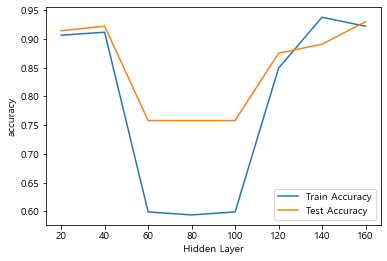

In [9]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

> Train/Test 데이터의 성능을 고려하여 40 선택

- Activation : 활성화 함수 변경

In [10]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(random_state=1234, hidden_layer_sizes=40, activation=v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainAccuracy"]=train_accuracy
df_accuracy_function["TestAccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.927,0.883
1,tanh,0.943,0.891
2,relu,0.911,0.922


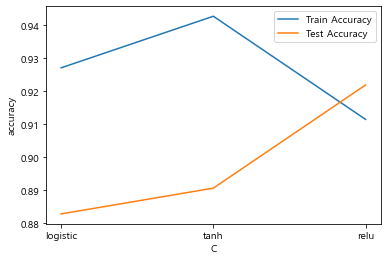

In [11]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> 각 activation 함수 마다, train, test 성능차이가 다름.   
> scale 변환 후 모델 성능 비교 필요


- Standardscaler : 설명변수 scale 변경

In [12]:
# 변수명 저장
v_feature_name=df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [13]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


-  scale이 조정된 데이터로 새로운 모델 생성

In [14]:
nn_scaled=MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))


Accuracy on training set: 0.995
Accuracy on test set: 0.953


> 모델 정확도는 train 99.5%, test 95.3%로 선능이 양호하고 유사한 수준

- Hidden Layer : 은닉층 변경

In [15]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# hidden_layer_sizes: 은닉층 변경 (20~240 by 30)
para_hidden=[20*hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(random_state=1234, hidden_layer_sizes=v_hidden)
    #nn=MLPClassifier(random_state=1234, hidden_layer_sizes=(v_hidden, v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["Trainaccuracy"]=train_accuracy
df_accuracy_hidden["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,Testaccuracy
0,20,0.995,0.938
1,40,0.995,0.945
2,60,0.995,0.945
3,80,0.995,0.938
4,100,0.995,0.953
5,120,0.995,0.953
6,140,0.995,0.953
7,160,0.995,0.953
8,180,0.995,0.945
9,200,0.995,0.953


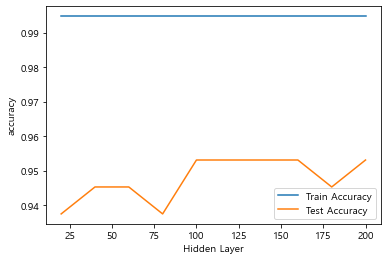

In [16]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

> 은닉층 구조가 더 복잡더라도 Train 데이터의 정확도는 유지됨  
> 데이터 성능을 고려하여 100 선택


- Activation : 활성화 함수 변경

In [17]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(random_state=1234, hidden_layer_sizes=100,activation=v_function)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["Trainaccuracy"]=train_accuracy
df_accuracy_function["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_function.round(3)

,ActivationFunction,Trainaccuracy,Testaccuracy
0,logistic,0.990,0.938
1,tanh,0.990,0.945
2,relu,0.995,0.953


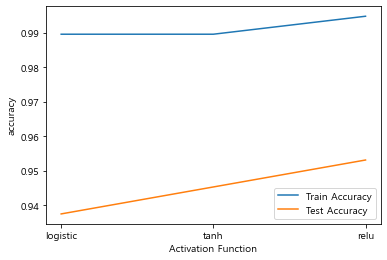

In [18]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

> "relu" 함수의 모델이 가장 높은 정확도를 보임  

- Slover : 가중치 최적화 변경

In [19]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# activation 변경
para_solver=["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn=MLPClassifier(random_state=1234, solver=v_solver, activation="relu", hidden_layer_sizes=100)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["Trainaccuracy"]=train_accuracy
df_accuracy_solver["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_solver.round(3)

,Solver,Trainaccuracy,Testaccuracy
0,lbfgs,1.000,0.953
1,sgd,0.958,0.906
2,adam,0.995,0.953


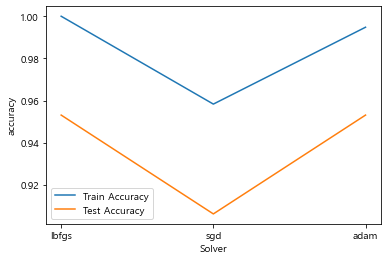

In [20]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()


> "lbfgs"와 "adam" 최적화 모델이 Test 데이터에 대해 같고 가장 높은 정확도를 보임.  
> 하지만 과적합을 고려하여 "adam" 모델 선택

- Mini Batch 변경

In [21]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# Mini Batch 변경
para_batch=[20*batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn=MLPClassifier(random_state=1234, batch_size=v_batch, solver="adam", activation="relu", hidden_layer_sizes=100)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch["Mini Batch"]=para_batch
df_accuracy_batch["Trainaccuracy"]=train_accuracy
df_accuracy_batch["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_batch.round(3)

,Mini Batch,Trainaccuracy,Testaccuracy
0,20,1.000,0.945
1,40,1.000,0.953
2,60,1.000,0.945
3,80,1.000,0.953
4,100,1.000,0.953
5,120,1.000,0.953
6,140,1.000,0.953
7,160,0.995,0.953
8,180,0.995,0.953


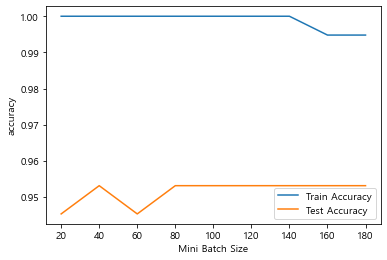

In [22]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()


> train 데이터에는 과적합 경향,   
> test 데이터 성능은 미니 배치 크기가 80이상일 때, 유지된다.  
> 데이터 성능을 고려햐여 40 선택

## 3. 최종 모델 선정 및 평가

### [목표변수 범주 예측 및 최종 모델 평가]

In [23]:
# 최종 모델
nn_final=MLPClassifier(random_state=1234, batch_size=40, solver="adam", activation="relu", hidden_layer_sizes=100)
nn_final.fit(df_scaled_train_x, df_train_y)

# 예측
y_pred=nn_final.predict(df_scaled_test_x)
# 1: 양성, 0: 음성
print("목표변수 범주 예측값:\n", y_pred, "\n")

# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

목표변수 범주 예측값:
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1] 

Accuracy on training set: 1.000

Accuracy on test set: 0.953

Confusion matrix: 
[[91  6]
 [ 0 31]]


> 모델 모델의 정확도는 train 100%, test 95.3%로 성능이 양호하고   
> train 데이터에 과적합  

> Confusion matrix를 보았을 때, FN 값이 0으로 실제 양성인 환자를 음성으로 판단한 경우가 없다는   
> 의미로 큰 위험은 피했다고 볼 수 있다. 